# Assignment Project By Bandana :
# EDA and Feature Engineering

## Part 1. Understanding the Structure of the Dataset

### *1.1. Import necessary libraries*

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### *1.2. Load the dataset*

In [333]:
df = pd.read_csv("second_hand_cars.csv")
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


### *1.3. Data types*

In [334]:
df.dtypes

Company Name                object
Car Name                    object
Variant                     object
Fuel Type                   object
Tyre Condition              object
Make Year                    int64
Owner Type                  object
Registration Number         object
Mileage                      int64
Price                        int64
Transmission Type           object
Body Color                  object
Service Record              object
Insurance                   object
Registration Certificate    object
Accessories                 object
dtype: object

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

### *1.4. Data shape*

In [336]:
print(df.shape)
print(f"The no of rows {df.shape[0]}")
print(f"The no of columns {df.shape[1]}")

(2500, 16)
The no of rows 2500
The no of columns 16


### *1.5. Understand feature*

- **Company Name:** The manufacturer of the car (e.g., Maruti, Hyundai). 
- **Car Name:** The model name of the car (e.g., Swift, i20).
- **Variant:** The specific variant of the car model (e.g., VDI, Sportz).
- **Fuel Type:** Type of fuel used by the car (e.g., Petrol, Diesel).
- **Tyre Condition:** Condition of the tyres (e.g., New, Good, Average, Worn).
- **Make Year:** Year the car was manufactured.
- **Owner Type:** Number of previous owners (e.g., First, Second, Third).
- **Registration Number:** The official registration number of the car.
- **Mileage:** The mileage of the car (in kmpl). 
- **Price:** The selling price of the car.
- **Transmission Type:** Type of transmission (e.g., Manual, Automatic).
- **Body Color:** Color of the car's body.
- **Service Record:** Whether the car ha service record (Yes/No). 
- **Insurance:** Whether the car has insurance (Yes/No).
- **Registration Certificate:** Whether the car has a registration certificate (Yes/No). 
- **Accessory:** Additional accessories available with the car. 

## Part 2.Handling Missing Data and Outliers

### *2.1. Identify missing values*

In [337]:
df.isnull().sum()

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64

### *2.2. Handling missing values*

In [338]:
# Drop Variant and Accessories column as we are not using them for analysis
df.drop(columns=["Variant", "Accessories"], inplace=True)

In [339]:
df.isnull().sum()

Company Name                0
Car Name                    0
Fuel Type                   0
Tyre Condition              0
Make Year                   0
Owner Type                  0
Registration Number         0
Mileage                     0
Price                       0
Transmission Type           0
Body Color                  0
Service Record              0
Insurance                   0
Registration Certificate    0
dtype: int64

### *2.3. Handling outliers*

*Box Plot*

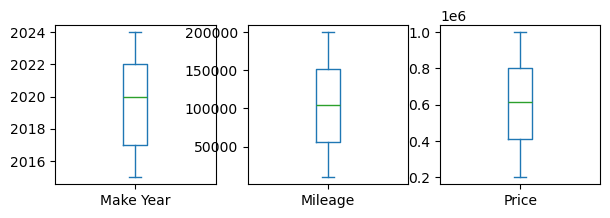

In [340]:
df.plot(kind="box", subplots=True, layout=(5,5), figsize=(12, 12), sharex=False, sharey=False)
plt.show()

There are no outliers in our numeric data columns Make Year, Mileage and Price

## Part 3. Exploratory Data Analysis Techniques

### *3.1. Basic Statistics of numerical data*

In [341]:
df.describe()

,Make Year,Mileage,Price
count,2500.000000,2500.000000,2500.000000
mean,2019.521600,104777.792000,608120.897600
std,2.894146,55544.487467,231056.126713
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,56313.000000,407791.000000
50%,2020.000000,104209.500000,612012.500000
75%,2022.000000,152149.250000,804567.000000
max,2024.000000,199755.000000,999826.000000


In [342]:
# calculating range
numeric_col = df.select_dtypes(include=["int64"]).columns
for col in numeric_col:
    range = df[col].max() - df[col].min()
    print(f"The range of '{col}' = {range}")

The range of 'Make Year' = 9
The range of 'Mileage' = 189745
The range of 'Price' = 799650


### *3.2. Basic statistics of categorical data*

In [343]:
df.describe(include="object")

,Company Name,Car Name,Fuel Type,Tyre Condition,Owner Type,Registration Number,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate
count,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
unique,10,10,3,3,3,2500,3,8,849,2,2
top,Nissan,F-150,CNG,New,Third,84-436-5584,Automatic,Blue,No Service Record,No Current Insurance,Available
freq,270,270,840,854,855,1,840,336,864,1286,1259


In [344]:
# frequncies of diffent items in column
categorical_col = df.select_dtypes(include=["object"]).columns
for col in categorical_col:
    frequencies = df[col].value_counts()
    print(frequencies)

Company Name
Nissan           270
Kia              266
Honda            257
Toyota           250
Chevrolet        249
Ford             249
Volkswagen       248
Maruti Suzuki    246
Renault          243
Hyundai          222
Name: count, dtype: int64
Car Name
F-150      270
Swift      268
Seltos     267
Elantra    260
Accord     255
Sunny      254
Polo       253
Camry      228
Cruze      225
Kwid       220
Name: count, dtype: int64
Fuel Type
CNG       840
Diesel    833
Petrol    827
Name: count, dtype: int64
Tyre Condition
New                  854
Needs Replacement    840
Used                 806
Name: count, dtype: int64
Owner Type
Third     855
Second    833
First     812
Name: count, dtype: int64
Registration Number
84-436-5584    1
99-107-3215    1
31-875-5968    1
30-383-5183    1
22-566-4066    1
              ..
26-478-7970    1
45-107-5490    1
49-473-2972    1
21-922-3626    1
25-274-7784    1
Name: count, Length: 2500, dtype: int64
Transmission Type
Automatic                840

In [345]:
# percentage of diffent items in column
for col in categorical_col:
    percent = df[col].value_counts(normalize=True) * 100
    print(percent)

Company Name
Nissan           10.80
Kia              10.64
Honda            10.28
Toyota           10.00
Chevrolet         9.96
Ford              9.96
Volkswagen        9.92
Maruti Suzuki     9.84
Renault           9.72
Hyundai           8.88
Name: proportion, dtype: float64
Car Name
F-150      10.80
Swift      10.72
Seltos     10.68
Elantra    10.40
Accord     10.20
Sunny      10.16
Polo       10.12
Camry       9.12
Cruze       9.00
Kwid        8.80
Name: proportion, dtype: float64
Fuel Type
CNG       33.60
Diesel    33.32
Petrol    33.08
Name: proportion, dtype: float64
Tyre Condition
New                  34.16
Needs Replacement    33.60
Used                 32.24
Name: proportion, dtype: float64
Owner Type
Third     34.20
Second    33.32
First     32.48
Name: proportion, dtype: float64
Registration Number
84-436-5584    0.04
99-107-3215    0.04
31-875-5968    0.04
30-383-5183    0.04
22-566-4066    0.04
               ... 
26-478-7970    0.04
45-107-5490    0.04
49-473-2972    0.04


### *3.3. Histogram*

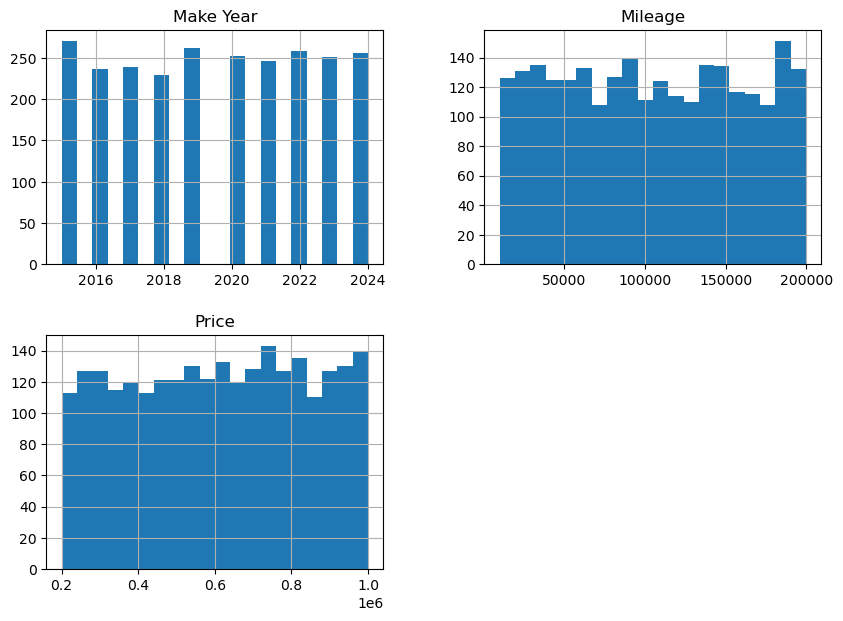

In [346]:
df.hist(bins=20, figsize=(10, 7))
plt.show()

### *3.4. Box plot*

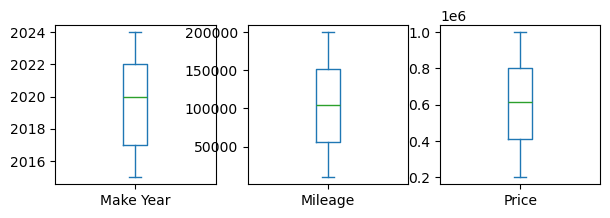

In [347]:
df.plot(kind="box", subplots=True, layout=(5, 5),
        figsize=(12, 12), sharex=False, sharey=False)
plt.show()

### *3.5. Scatter plot*

#### i. Mileage vs Price

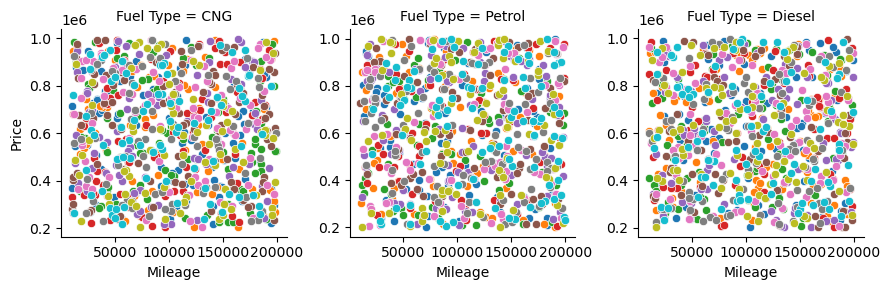

In [348]:
# by fuel type
g = sns.FacetGrid(df, col="Fuel Type", sharey=False, hue="Make Year")
g.map(sns.scatterplot, "Mileage", "Price")
plt.show()

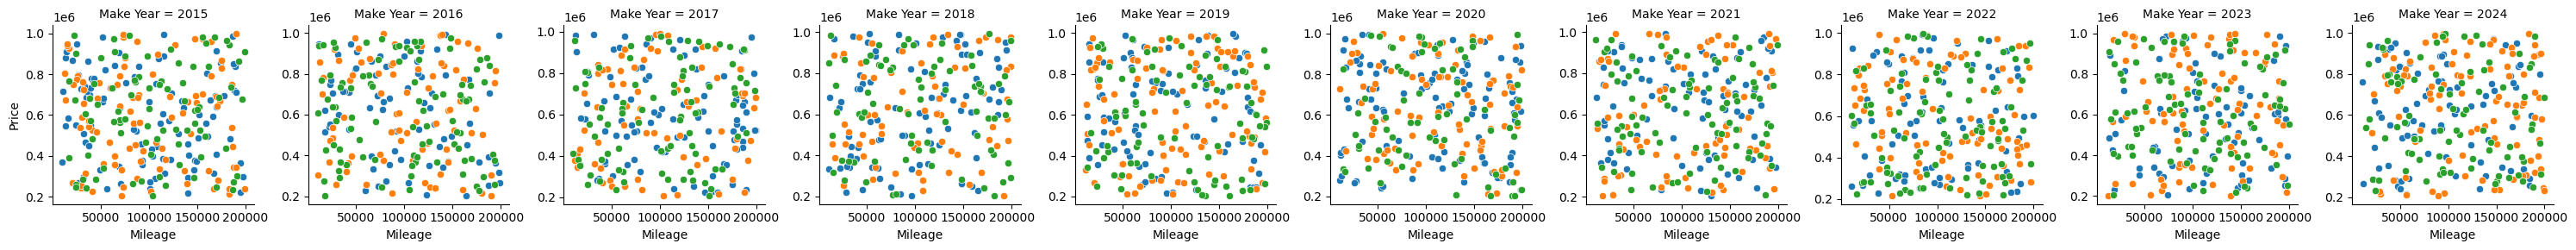

In [349]:
# by make year
g = sns.FacetGrid(df, col="Make Year", sharey=False, hue="Fuel Type")
g.map(sns.scatterplot, "Mileage", "Price")
plt.show()

### *3.6. Bar Plot*

### i. Company Name vs Average Price

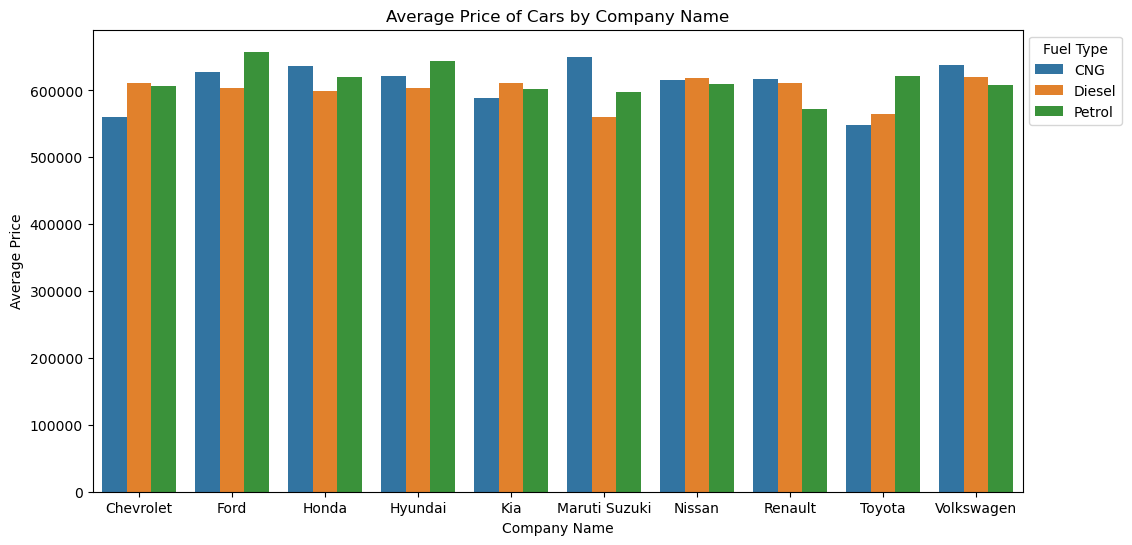

In [350]:
grouped = df.groupby(["Company Name", "Fuel Type"])[
    "Price"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x="Company Name", y="Price", hue="Fuel Type")
plt.title('Average Price of Cars by Company Name')
plt.xlabel('Company Name')
plt.ylabel('Average Price')
plt.legend(loc='upper right')
plt.legend(title='Fuel Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### *3.7. Line Plot*

#### i. Make Year vs Average Price

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


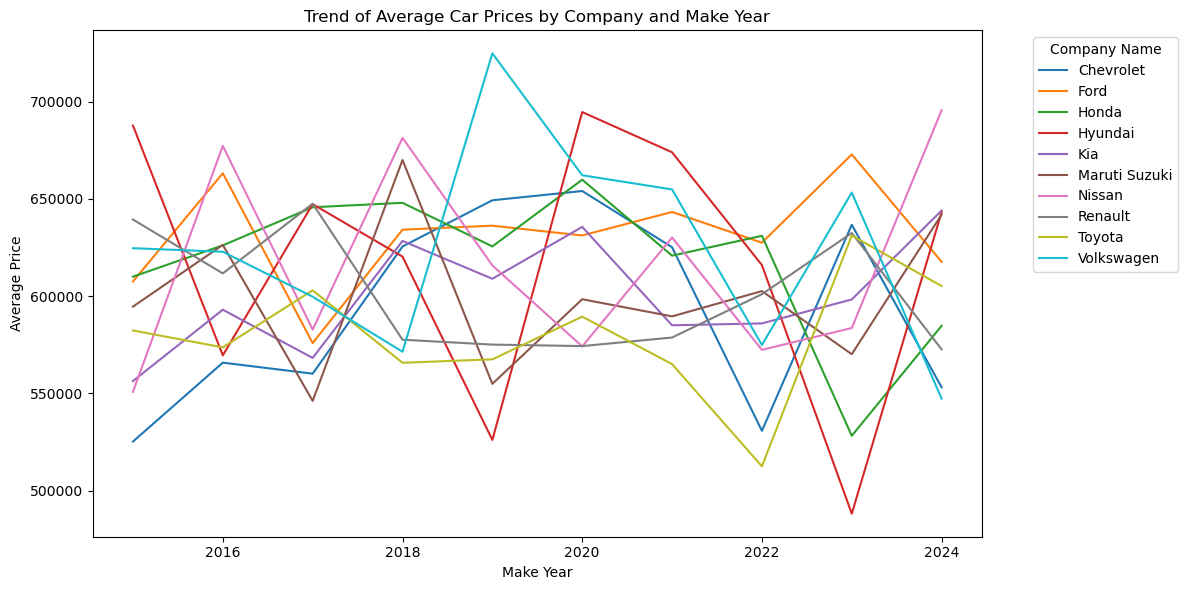

In [351]:
grouped = df.groupby(["Company Name", "Make Year"])["Price"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x="Make Year", y="Price", hue="Company Name")
plt.title('Trend of Average Car Prices by Company and Make Year')
plt.xlabel('Make Year')
plt.ylabel('Average Price')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4. Feature Engineering

### *4.1 Extract new featues*

In [352]:
# extract Year from Make Year and add in the column of dataset
df["Year"] = df["Make Year"]


### *4.2. Remove some features*

In [353]:
df.drop(columns=["Make Year", "Tyre Condition", "Owner Type", "Registration Number", "Transmission Type", "Body Color", "Service Record", "Insurance", "Registration Certificate" ], inplace=True)

In [354]:
df.head()

,Company Name,Car Name,Fuel Type,Mileage,Price,Year
0,Maruti Suzuki,Cruze,CNG,52798,759107,2018
1,Kia,Seltos,Petrol,43412,505071,2020
2,Kia,Accord,Petrol,95219,635322,2022
3,Nissan,Seltos,Diesel,70370,483152,2024
4,Chevrolet,Kwid,Petrol,85852,712961,2018


### *4.3 Convert categorical variables into dummy variables*

In [355]:
object_columns = df.select_dtypes(include="object").columns
df_dummies = pd.get_dummies(
    df, object_columns, drop_first=True)
df_dummies.head()

,Mileage,Price,Year,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,Company Name_Renault,...,Car Name_Cruze,Car Name_Elantra,Car Name_F-150,Car Name_Kwid,Car Name_Polo,Car Name_Seltos,Car Name_Sunny,Car Name_Swift,Fuel Type_Diesel,Fuel Type_Petrol
0,52798,759107,2018,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,43412,505071,2020,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,95219,635322,2022,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,70370,483152,2024,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,85852,712961,2018,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


### *4.4 Normalize numerical features*

In [360]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_dummies[["Mileage", "Price"]] = scaler.fit_transform(df_dummies[["Mileage", "Price"]])
df_dummies.head()


,Mileage,Price,Year,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,Company Name_Renault,...,Car Name_Cruze,Car Name_Elantra,Car Name_F-150,Car Name_Kwid,Car Name_Polo,Car Name_Seltos,Car Name_Sunny,Car Name_Swift,Fuel Type_Diesel,Fuel Type_Petrol
0,-0.936010,0.653591,2018,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,-1.105025,-0.446084,2020,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,-0.172127,0.117749,2022,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.619588,-0.540968,2024,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,-0.340800,0.453834,2018,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


### *4.5. Bin continuous variables into categorical ones*

In [357]:
bins = [0, 50000, 100000, 150000, 200000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k']
df_mileage_bins = df_dummies.copy()
df_mileage_bins['Mileage Binned'] = pd.cut(
    df_dummies['Mileage'], bins=bins, labels=labels)
df_mileage_bins.head()

,Mileage,Price,Year,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,Company Name_Renault,...,Car Name_Elantra,Car Name_F-150,Car Name_Kwid,Car Name_Polo,Car Name_Seltos,Car Name_Sunny,Car Name_Swift,Fuel Type_Diesel,Fuel Type_Petrol,Mileage Binned
0,-0.936010,0.653591,2018,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,NaN
1,-1.105025,-0.446084,2020,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,NaN
2,-0.172127,0.117749,2022,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,NaN
3,-0.619588,-0.540968,2024,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,NaN
4,-0.340800,0.453834,2018,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,NaN


### *4.6. Encode categorical variables into numerical*

In [358]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_dummies_encoded = encoder.fit_transform(df_dummies)
df_dummies_encoded

<2500x5028 sparse matrix of type '<class 'numpy.float64'>'
	with 57500 stored elements in Compressed Sparse Row format>

### *4.7. Identify hightly correlated features*

In [359]:
correlation_matrix = df_dummies.corr()
print(correlation_matrix)

                             Mileage     Price      Year  Company Name_Ford  \
Mileage                     1.000000 -0.027504  0.043648           0.010169   
Price                      -0.027504  1.000000 -0.000419           0.033108   
Year                        0.043648 -0.000419  1.000000          -0.023948   
Company Name_Ford           0.010169  0.033108 -0.023948           1.000000   
Company Name_Honda          0.002122  0.013647 -0.000023          -0.112581   
Company Name_Hyundai        0.008508  0.020225 -0.011564          -0.103827   
Company Name_Kia           -0.008600 -0.010432  0.005494          -0.114765   
Company Name_Maruti Suzuki -0.020952 -0.009901 -0.015461          -0.109876   
Company Name_Nissan        -0.018634  0.009864  0.021008          -0.115729   
Company Name_Renault        0.021561 -0.009651  0.003384          -0.109131   
Company Name_Toyota        -0.007229 -0.040550  0.015022          -0.110864   
Company Name_Volkswagen     0.010961  0.019966  0.00